# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [3]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [4]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, virtualBatchSize=20, batchSize=1, learningRate=1e-3)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 4.0406086325645445+-(2SEM)0.12236975585930299      
Epoch 1 finished      
avg. loss: 3.502812457084656+-(2SEM)0.07377302613566807      
Epoch 2 finished      
avg. loss: 3.4814413189888+-(2SEM)0.1428074723075582      
Epoch 3 finished      
avg. loss: 3.4088879346847536+-(2SEM)0.11878200696931387      
Epoch 4 finished      
avg. loss: 3.1416052103042604+-(2SEM)0.12015957280536119      
Epoch 5 finished      
avg. loss: 3.1263023018836975+-(2SEM)0.10663066269959776      
Epoch 6 finished      
avg. loss: 3.1584340214729307+-(2SEM)0.12575049002455904      
Epoch 7 finished      
avg. loss: 3.0396712899208067+-(2SEM)0.10747548720793493      
Epoch 8 finished      
avg. loss: 3.0480133414268495+-(2SEM)0.06656020119200944      
Epoch 9 finished      
avg. loss: 3.055660343170166+-(2SEM)0.11437936247323074      
Epoch 10 finished      
avg. loss: 2.991353619098663+-(2SEM)0.10654485696261277      
Epoch 11 finished      
avg. loss: 2.9699657201766967+-(2SEM

avg. loss: 2.9518949031829833+-(2SEM)0.10017741447198587      
Epoch 93 finished      
avg. loss: 2.9078454613685607+-(2SEM)0.09093531108704857      
Epoch    93: reducing learning rate of group 0 to 3.1250e-05.
Epoch 94 finished      
avg. loss: 3.0062668085098267+-(2SEM)0.07407439541905494      
Epoch 95 finished      
avg. loss: 2.9983760833740236+-(2SEM)0.11957625624876597      
Epoch 96 finished      
avg. loss: 3.068276751041412+-(2SEM)0.11083870917961866      
Epoch 97 finished      
avg. loss: 2.941111218929291+-(2SEM)0.11487943922269178      
Epoch 98 finished      
avg. loss: 2.8952656507492067+-(2SEM)0.08068859920381094      
Epoch 99 finished      
avg. loss: 3.0025407791137697+-(2SEM)0.10112578656447263      
Epoch 100 finished      
avg. loss: 3.0260324478149414+-(2SEM)0.06984503301589658      
Epoch 101 finished      
avg. loss: 2.9592334628105164+-(2SEM)0.08617649028193365      
Epoch 102 finished      
avg. loss: 2.9836663722991945+-(2SEM)0.10164396661411243      
Epoc

Epoch 181 finished      
avg. loss: 2.981876254081726+-(2SEM)0.109578125997818      
Epoch 182 finished      
avg. loss: 2.96508731842041+-(2SEM)0.09704461088598637      
Epoch 183 finished      
avg. loss: 3.042416441440582+-(2SEM)0.08636262814910445      
Epoch 184 finished      
avg. loss: 2.984818434715271+-(2SEM)0.0923012619317971      
Epoch 185 finished      
avg. loss: 2.893693447113037+-(2SEM)0.11002668638292568      
Epoch 186 finished      
avg. loss: 2.941517376899719+-(2SEM)0.11593366808208885      
Epoch 187 finished      
avg. loss: 2.910757613182068+-(2SEM)0.10481431045558846      
Epoch 188 finished      
avg. loss: 2.9959394097328187+-(2SEM)0.10619089584552138      
Epoch 189 finished      
avg. loss: 3.015942394733429+-(2SEM)0.09071833481532424      
Epoch   189: reducing learning rate of group 0 to 1.2207e-07.
Epoch 190 finished      
avg. loss: 2.937486720085144+-(2SEM)0.1167011905239497      
Epoch 191 finished      
avg. loss: 2.9012454390525817+-(2SEM)0.09795960

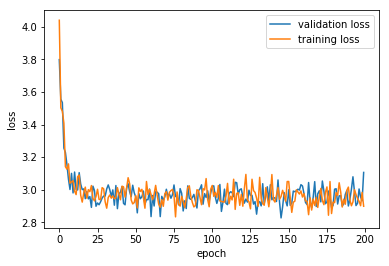

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()